<a href="https://colab.research.google.com/github/mareckiw/CP_summer_2019/blob/master/mw75664.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# Clear environment
rm(list = ls())

In [ ]:
%%R
# download and load libraries
if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")
if(!require(olsrr)) install.packages("olsrr", repos = "http://cran.us.r-project.org")
if(!require(mgcv)) install.packages("mgcv", repos = "http://cran.us.r-project.org")
if(!require(nnet)) install.packages("nnet", repos = "http://cran.us.r-project.org")
if(!require(rpart)) install.packages("rpart", repos = "http://cran.us.r-project.org")
if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(rpart.plot)) install.packages("rpart.plot", repos = "http://cran.us.r-project.org")
if(!require(mltools)) install.packages("mltools", repos = "http://cran.us.r-project.org")
if(!require(PRROC)) install.packages("PRROC", repos = "http://cran.us.r-project.org")
if(!require(randomForest)) install.packages("randomForest", repos = "http://cran.us.r-project.org")
if(!require(ROCR)) install.packages("ROCR", repos = "http://cran.us.r-project.org")


In [60]:
%%R
library(tidyverse)
library(caret)
#library(ROSE)
library(rpart)
library(rpart.plot)
library(ROCR)
library(mltools)
library(randomForest)
library(mgcv)

In [162]:
%%R
# Task1(12p)
# In the task, use the data from 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
# You can load the data using:
#read.fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', widths = rep(4, 25), header = FALSE)
data = read.fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', widths = rep(4, 25), header = FALSE)
print(head(data))
glimpse(data)

  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  1  6  4 12  5  5  3  4  1  67   3   2   1   2   1   0   0   1   0   0   1
2  2 48  2 60  1  3  2  2  1  22   3   1   1   1   1   0   0   1   0   0   1
3  4 12  4 21  1  4  3  3  1  49   3   1   2   1   1   0   0   1   0   0   1
4  1 42  2 79  1  4  3  4  2  45   3   1   2   1   1   0   0   0   0   0   0
5  1 24  3 49  1  3  3  4  4  53   3   2   2   1   1   1   0   1   0   0   0
6  4 36  2 91  5  3  3  4  4  35   3   1   2   2   1   0   0   1   0   0   0
  V22 V23 V24 V25
1   0   0   1   1
2   0   0   1   2
3   0   1   0   1
4   0   0   1   1
5   0   0   1   2
6   0   1   0   1
Rows: 1,000
Columns: 25
$ V1  <int> 1, 2, 4, 1, 1, 4, 4, 2, 4, 2, 2, 1, 2, 1, 1, 1, 4, 1, 2, 4, 4, 1, …
$ V2  <int> 6, 48, 12, 42, 24, 36, 24, 36, 12, 30, 12, 48, 12, 24, 15, 24, 24,…
$ V3  <int> 4, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 0, 2, 2, 4, 2, …
$ V4  <int> 12, 60, 21, 79, 49, 91, 28, 69, 31, 52, 13, 43, 16, 12, 14,

In [154]:
%%R
# (1p) Rename 25th column to 'target'.It contains information about bank's clients default - 2 => client with a default, 1=> client with no default. 
print(names(data)[25])
names(data)[25] <- "target" # raname column to target
print(names(data)[25])


[1] "target"
[1] "target"


In [160]:
%%R
#Recode 'target' 
print(unique(data[c("target")]))
data$target <- ifelse(data$target=="2", 1, 0) #if 2 put 1, else 0
print(unique(data[c("target")]))
glimpse(train)

  target
1      0
2      1
  target
1      0
Rows: 900
Columns: 25
$ V1     <int> 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 4, 2, 2, 2, 3, …
$ V2     <int> 36, 6, 12, 14, 24, 12, 6, 60, 10, 12, 15, 12, 18, 48, 24, 6, 36…
$ V3     <int> 2, 2, 2, 2, 2, 4, 4, 3, 4, 2, 4, 2, 4, 1, 2, 4, 4, 2, 3, 3, 3, …
$ V4     <int> 24, 13, 35, 90, 40, 13, 3, 157, 22, 31, 23, 75, 61, 77, 16, 19,…
$ V5     <int> 5, 3, 5, 1, 1, 5, 3, 1, 1, 4, 3, 5, 1, 1, 1, 1, 5, 2, 2, 2, 1, …
$ V6     <int> 3, 3, 2, 5, 4, 5, 5, 4, 2, 4, 3, 1, 5, 4, 5, 1, 3, 3, 5, 5, 5, …
$ V7     <int> 2, 1, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 1, 3, …
$ V8     <int> 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, …
$ V9     <int> 3, 1, 2, 2, 2, 4, 3, 3, 1, 1, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 1, …
$ V10    <int> 25, 62, 45, 45, 25, 57, 52, 21, 48, 61, 27, 24, 33, 37, 55, 36,…
$ V11    <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, …
$ V12    <int> 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,

Rows: 900
Columns: 25
$ V1     <int> 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 4, 2, 2, 2, 3, …
$ V2     <int> 36, 6, 12, 14, 24, 12, 6, 60, 10, 12, 15, 12, 18, 48, 24, 6, 36…
$ V3     <int> 2, 2, 2, 2, 2, 4, 4, 3, 4, 2, 4, 2, 4, 1, 2, 4, 4, 2, 3, 3, 3, …
$ V4     <int> 24, 13, 35, 90, 40, 13, 3, 157, 22, 31, 23, 75, 61, 77, 16, 19,…
$ V5     <int> 5, 3, 5, 1, 1, 5, 3, 1, 1, 4, 3, 5, 1, 1, 1, 1, 5, 2, 2, 2, 1, …
$ V6     <int> 3, 3, 2, 5, 4, 5, 5, 4, 2, 4, 3, 1, 5, 4, 5, 1, 3, 3, 5, 5, 5, …
$ V7     <int> 2, 1, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 1, 3, …
$ V8     <int> 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, …
$ V9     <int> 3, 1, 2, 2, 2, 4, 3, 3, 1, 1, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 1, …
$ V10    <int> 25, 62, 45, 45, 25, 57, 52, 21, 48, 61, 27, 24, 33, 37, 55, 36,…
$ V11    <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, …
$ V12    <int> 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 2, 4, 2, 1, …
$ V13    <int> 1, 

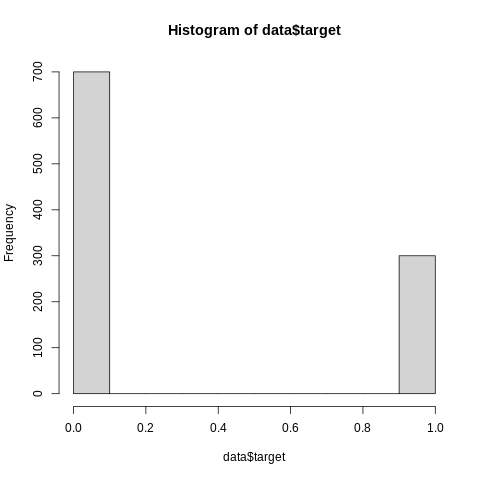

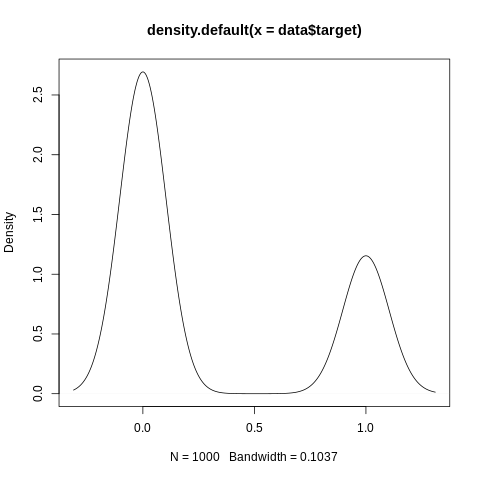

In [159]:
%%R
# (3p) Check frequencies of 'target' values. How can we cope with unbalanced data? Name at least 3 solutions. Randomly undersample the data to have 50/50 proportions of 'target' values.
hist(data$target)
plot(density(data$target))
# (1p) Divide balanced data into training (90%) and validation (10%) with seed  equal to 12
set.seed(12)
rand = sample(1:nrow(data),0.9*nrow(data)) #random 80% of indexes values
train = data[rand,]
test = data[-rand,]

In [161]:
%%R
# (1p) Build logistic regression model with 'glm' function. We want to classify 'target' using all other features in a dataset.
model = glm(target ~ ., data = train, family = binomial())
model
# (2p) Conduct feature selection using 'step' function. Use HQC (Hannan-Quinn Information Criterion) as model selection criterion. How many variables were removed from model compared to initial logistic regression?
HQC.logit = step(model, k = 2*log(log(nrow(train))), trace = 0)
HQC.logit
summary(HQC.logit)
#there are only 1 + V2 + V3 + V5 + V11 + V17 + V18 + V19 + V21 left, so 9 is left, so 25-9=16 was removed


Call:
glm(formula = target ~ V1 + V2 + V3 + V5 + V6 + V9 + V11 + V15 + 
    V16 + V17 + V18 + V19 + V20, family = binomial(), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0673  -0.7313  -0.4360   0.8097   2.6113  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.990214   0.904198   2.201 0.027730 *  
V1          -0.557411   0.072854  -7.651 1.99e-14 ***
V2           0.039024   0.007247   5.385 7.24e-08 ***
V3          -0.375947   0.082592  -4.552 5.32e-06 ***
V5          -0.222246   0.061028  -3.642 0.000271 ***
V6          -0.157123   0.070038  -2.243 0.024870 *  
V9           0.180215   0.088028   2.047 0.040633 *  
V11         -0.273757   0.113955  -2.402 0.016291 *  
V15         -1.297133   0.597072  -2.172 0.029819 *  
V16          0.619768   0.196655   3.152 0.001624 ** 
V17         -0.718567   0.330661  -2.173 0.029771 *  
V18          1.006435   0.414868   2.426 0.015270 *  
V19          1.397702   0.56

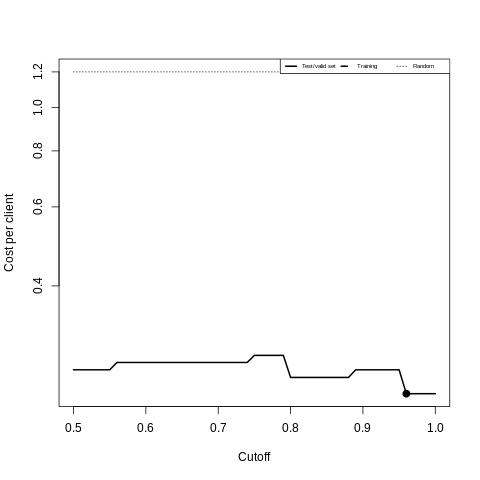

In [190]:
%%R
# (4p) Using model after feature selection, conduct cost-based threshold optimization on test data with False Positive cost equal to 1 and False Negative Equal to 3. 
#What is the optimal cutoff threshold?
CalculateCost = function(cut.off, cost.matrix, score, true.y){
    prediction = ifelse(score > cut.off, 1, 0)
    confusion.matrix = prop.table(table(factor(prediction, levels = c(0, 1)),
                                        true.y))
    return(sum(cost.matrix * confusion.matrix))
}

score = costs = list()

#test data
CUT_OFFS = seq(0.5, 1, by = 0.01) 
false_positive = 1
false_negative = 3
COST_MATRIX = matrix(c(0, false_negative, false_positive, 0), 2)

score[[1]] = predict(HQC.logit, newdata = test)
costs[[1]] = sapply(CUT_OFFS, CalculateCost, cost.matrix = COST_MATRIX,
                    score = score[[1]], true.y = test$target)

#get optimal cut off
cost_cut_offs <- data.frame(costs[[1]], CUT_OFFS)
names(cost_cut_offs)[1] <- "costs"

# Cut-off that minimise the cost

cost_cut_offs %>% 
    filter(costs == min(costs)) %>% 
    slice(1)

#plot cut offs
plot(data.frame(CUT_OFFS, 1.2), type = "l", lty = 3, log="y",
     ylim = range(c(1.2, unlist(costs))),
     ylab = "Cost per client", xlab = "Cutoff")

for (i in 1:1) {
    lines(CUT_OFFS, costs[[i]], lty = i, lwd = 2)
    points(CUT_OFFS[which.min(costs[[i]])], min(costs[[i]]), cex = 1.3, pch=19)
}

legend("topright", c("Test/valid set", "Training", "Random"),
       lty = c(1, 2, 3), cex = .5, ncol = 3,
       lwd = c(2, 2, 1))

In [196]:
%%R
# Task2(24p)
data2 = read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv",sep=",",header=TRUE, stringsAsFactors = FALSE)
#print(head(data2))
glimpse(data2)


Rows: 116
Columns: 10
$ Age            <int> 48, 83, 82, 68, 86, 49, 89, 76, 73, 75, 34, 29, 25, 24,…
$ BMI            <dbl> 23.50000, 20.69049, 23.12467, 21.36752, 21.11111, 22.85…
$ Glucose        <int> 70, 92, 91, 77, 92, 92, 77, 118, 97, 83, 78, 82, 82, 88…
$ Insulin        <dbl> 2.707, 3.115, 4.498, 3.226, 3.549, 3.226, 4.690, 6.470,…
$ HOMA           <dbl> 0.4674087, 0.7068973, 1.0096511, 0.6127249, 0.8053864, …
$ Leptin         <dbl> 8.8071, 8.8438, 17.9393, 9.8827, 6.6994, 6.8317, 6.9640…
$ Adiponectin    <dbl> 9.702400, 5.429285, 22.432040, 7.169560, 4.819240, 13.6…
$ Resistin       <dbl> 7.99585, 4.06405, 9.27715, 12.76600, 10.57635, 10.31760…
$ MCP.1          <dbl> 417.114, 468.786, 554.697, 928.220, 773.920, 530.410, 1…
$ Classification <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [197]:
%%R
# (1p) Check if any data is missing. If so, remove data from the dataset.
data2[data2 == "?"] <- NA
print(sum(is.na(data2)))
print(sum(apply(data2, 1, anyNA)))
#thre is no missings! we can continue!
# (1p) Recode the variable Classification - ill patients should be denoted as 1 and healthy as 0 - do not create a new variable, but overwrite it
print(unique(data2[c("Classification")]))
data2$Classification <- ifelse(data2$Classification=="2", 1, 0) #if 2 put 1, else 0
print(unique(data2[c("Classification")]))

[1] 0
[1] 0
   Classification
1               1
53              2
   Classification
1               0
53              1


In [198]:
%%R
# (2p) By how many years on average (variable Age) people with breast cancer are older/younger than the others?
age1 =mean(data2$Age[data2$Classification==0])
age2 = mean(data2$Age[data2$Classification==1])
diff = age1 - age2
print(diff)
#The people with breast cancer are by average 1,4 year younger than wihtout b.cancer

# (1p) What is the average Insulin level (Insulin variable) for users with a BMI over 23?
print(mean(data2$Insulin[data2$BMI>23]))
#the avg insuline level for users with bmi over 23 is 11,25

[1] 1.405048
[1] 11.25393


In [200]:
%%R
# (1p) Randomly divide observations into a training (80% share) and test (20%) set with a seed of 12.
set.seed(32)
rand = sample(1:nrow(data2),0.8*nrow(data2))
train_data2 = data2[rand,]
test_data2 = data2[-rand,]
glimpse(train_data2)
#glimpse(test_data2)



Rows: 92
Columns: 10
$ Age            <int> 51, 46, 52, 48, 61, 45, 62, 65, 51, 76, 44, 43, 51, 41,…
$ BMI            <dbl> 19.13265, 20.83000, 30.80125, 32.46191, 32.03896, 29.38…
$ Glucose        <int> 93, 88, 87, 99, 85, 90, 100, 97, 105, 94, 114, 89, 103,…
$ Insulin        <dbl> 4.364, 3.420, 30.212, 28.677, 18.077, 4.713, 4.530, 5.7…
$ HOMA           <dbl> 1.0011016, 0.7423680, 6.4834952, 7.0029234, 3.7901443, …
$ Leptin         <dbl> 11.0816, 12.8700, 29.2739, 46.0760, 30.7729, 23.8479, 1…
$ Adiponectin    <dbl> 5.807620, 18.550000, 6.268540, 21.570000, 7.780255, 6.6…
$ Resistin       <dbl> 5.57055, 13.56000, 24.24591, 10.15726, 13.68392, 15.556…
$ MCP.1          <dbl> 90.600, 301.210, 764.667, 738.034, 444.395, 621.273, 33…
$ Classification <dbl> 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1…


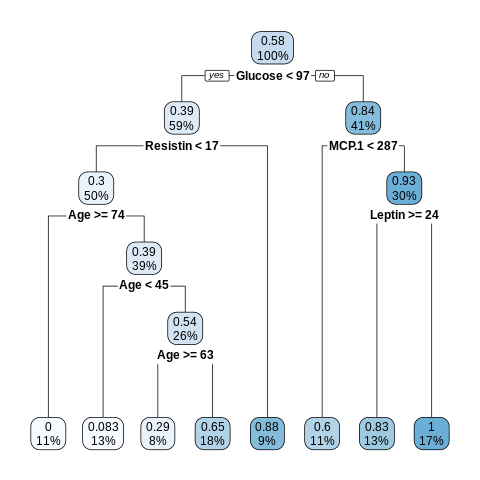

In [201]:
# (2p) Prepare the decision tree from the 'rpart' package based on the data from the training set. 
#The target variable is Classification, use all others to explain it. Set the parameter CP to 0. 
#Remember that rpart infers a task by the type of target variable and we are interested in classification
%%R
rpart <- rpart(train_data2$Classification ~., data=train_data2,cp=0)
rpart.plot(rpart) #confirmation

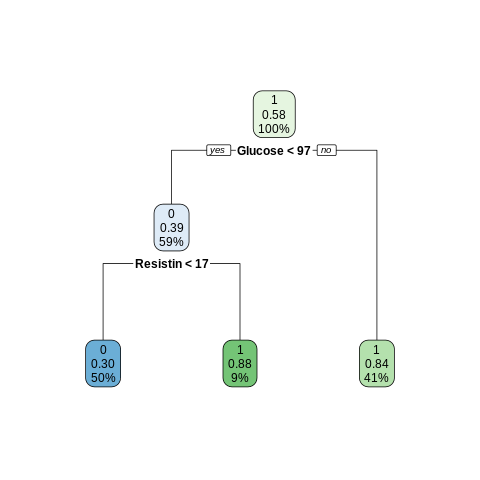

In [202]:
%%R
# (3p) Choose the optimal level of tree complexity, based on CP parameter table produced by rpart. 
#Cut the tree to the optimal size. Explain how to pick the optimal CP level.
rpart$cptable

cp_optimal = rpart$cptable[which(rpart$cptable[,"xerror"]==min(rpart$cptable[,"xerror"])),"CP"]

rpart_optimal = rpart(as.factor(Classification)~., 
                         data= train_data2,
                         cp=cp_optimal)
# (2p) Draw a pruned decision tree from previous point (with rules).
rpart.plot(rpart_optimal)

In [206]:
%%R
# (2p) Write one example of decision rule generated by a tree (if ... and ... then we predict than patient is ...)

if (!(data2$Resistin < 20)){
    data2$Classification == 1}

# (2p) Prepare the confusion matrix for the test set, assuming a cutoff threshold of 0.40
preds <- predict(rpart_optimal, test_data2)
preds <- preds[, 2]
preds <- ifelse(preds > 0.4, 1, 0) #define a cut off point here
print(preds)
class_table = table(predictions, round(test_data2$Classification))
class_table

  3   4   7   9  21  23  26  27  29  31  33  36  41  56  78  82  86  88  95  96 
  0   0   0   1   0   1   0   1   1   1   1   0   0   0   1   1   1   1   1   1 
102 109 112 116 
  0   1   0   1 
           
predictions 0 1
          0 7 3
          1 6 8


In [53]:
%%R
# (3p) Based on the confusion matrix created calculate accuracy, recall and precision. Verify the quality of the tree (subjectively).
# ACC = (TP + TN)/(TP + FP + TN + FN)
acc = (class_table[1,1]+class_table[2,2])/sum(class_table)
print(acc)

# REC = TP / (TP + FN)
rec = class_table[2, 2] / sum(class_table[2, ])
print(rec)

#PRECISION
prec = class_table[2,2]/sum(class_table[,2])
print(prec)

#When it comes to the subjective opinion of the tree quality, this is interesting case I think. Both Accuracy and Precision are not so high (around .66) but recall is high.
#Due to this fact, I think it's hard to say in one word if tree is good or bad or superb. It looks like we are in a case when our model is not good in describing the reality, because 
# even if we are able to correctly identify most of positive class, but precision is low so when we take into account both (All) classes we are not scoring that good.
#therefore Accuracy can be very misleading for inbalanced datasets. We have high recall so most of the observations are "available" to be cartched/ seen for our model and we can catch them, but due to low precision our model is not having many observations available for him to be catched with high recall.

[1] 0.6666667
[1] 0.9230769
[1] 0.6315789


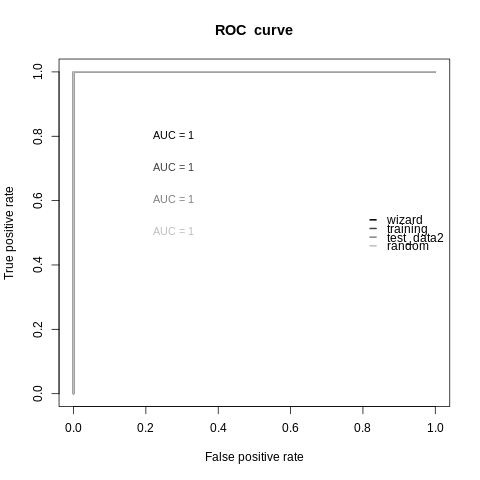

In [72]:
%%R
# (2p) Draw a ROC curve for the prediction on the test set
# Graphical measures of fit
library(ROCR)
score.or.class = gain = lift = roc = auc = prediction.object = list()
score.or.class[[1]] = list(test_data2$Classification, test_data2$Classification)
score.or.class[[2]] = list(predict(rpart_optimal),
                           train_data2$Classification)
score.or.class[[3]] = list(predict(rpart_optimal, new = test_data2),
                           test_data2$Classification)
class.average = mean(test_data2$Classification)
random.class = 1
for (i in 1:(nrow(test_data2) - 1)) {
    random.class = c(random.class, mean(random.class) < class.average)
}
score.or.class[[4]] = list(seq(0, 1, len = nrow(test_data2)), random.class)

for (i in 1:length(score.or.class)) {
    prediction.object[[i]] = prediction(score.or.class[[i]][[2]],
                                        score.or.class[[i]][[2]])
    gain[[i]] = performance(prediction.object[[i]], "tpr", "rpp")
    lift[[i]] = performance(prediction.object[[i]], "lift", "rpp")
    roc[[i]] = performance(prediction.object[[i]], "tpr", "fpr")
    auc[[i]] = performance(prediction.object[[i]], "auc")
}

LEGEND_LABELS = c("wizard", "training", "test", "random")
#Creating plots
ShowCurve = function(list, name, AUC = FALSE, legend.position = "right") {
    for (i in 1:length(list)) {
        plot(list[[i]], main = paste(name, " curve"),
             col = gray((i - 1) / 4), lwd = 2, add = (i != 1), xlim = c(0, 1))
        if (AUC) {
            text(.2, 0.9 - i * 0.1, pos = 4, col = gray((i - 1) / 4), cex = .9,
                 paste("AUC =", round(auc[[i]]@y.values[[1]], digit = 2)))
        }
    }
    legend(legend.position, lty = 2, lwd = 2, col = gray(0:3 / 4),
           y.intersp = .6, legend = LEGEND_LABELS, seg.len = 0.6, bty = "n")
}

ShowCurve(roc, "ROC", AUC = TRUE)

In [85]:
%%R
# (2p) Calculate AUC for training and test set. Is the model overfitted? Why/Why not? (comment)
print(auc_roc(predictions, train_data2$Classification))
print(auc_roc(predictions, test_data2$Classification))
#Our testing accuracy is greater than our training, so our model ir rather underfitted than overfitted. 
#Basically, our model probaly has more information than it could learn from the data without 'memorizing' the data.


[1] 0.4978643
[1] 0.5777778


In [90]:
# Task3(14p)
%%R
# In the task, use the data from 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# The quality of white wines is contained in a variable quality.
# The data is separated by a semicolon and has headers. You can load the data using:
data3 = read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', stringsAsFactors = F, sep =';', header = T)

# (1p) Check if any data is missing. If so, remove missing data from the dataset.
data3[data3 == "?"] <- NA
print(sum(is.na(data3)))
print(sum(apply(data3, 1, anyNA)))
sum(is.na(data3))
#nomissings at all here again

[1] 0
[1] 0
[1] 0


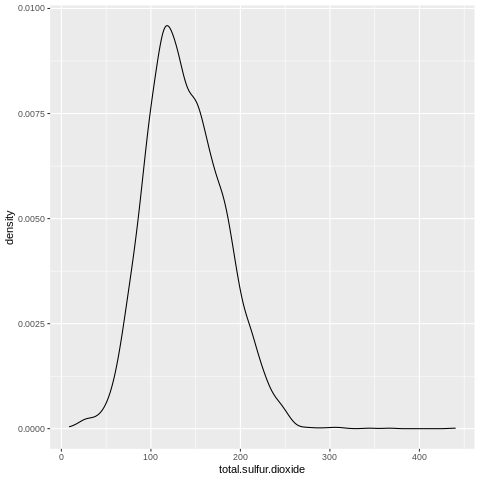

In [91]:
%%R
# (2p) Prepare the histogram and density estimation curve (on the same plot) of the variable free.sulfur.dioxide.
ggplot(data3, aes(x=free.sulfur.dioxide)) + geom_histogram() # Histogram

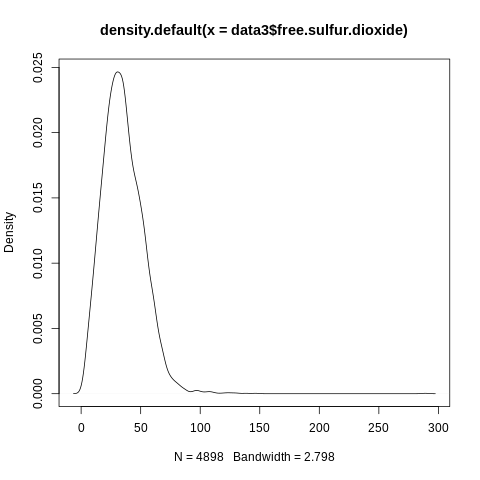

In [95]:
%%R
#density estimation curve
plot(density(data3$free.sulfur.dioxide))

In [125]:
%%R
# (1p) Divide data into training (85%) and validation (15%) with seed equal to 32
set.seed(32)
indices = sample(1:nrow(data3),0.85*nrow(data3)) #random 85% of indexes values
train_data3 = data3[indices,]
test_data3 = data3[-indices,]
#another way I tried because I struggled with some exercises later on, but the result of this splitting is the same
rand = sample(1:nrow(data3),0.85*nrow(data3)) #random 85% of indexes values
train_data3 = data3[rand,]
test_data3 = data3[-rand,]

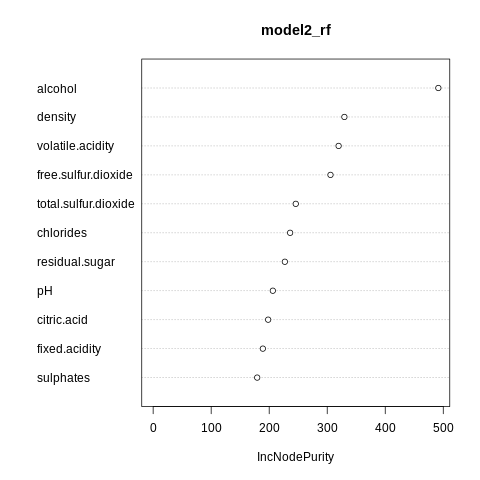

In [126]:
%%R
# (3p) Prepare a random forest model with library 'randomForest' using default parameter values, with wine quality as 
#target variable and all other variables as predictors. Which 2 explanatory variables explain the most of wine quality variance?
model2_rf = randomForest(quality~., data=train_data3)

varImpPlot(model2_rf)
#Density and alcohol are the vars which describe (influence) the most wine quality variance. Alcohol is way more explaining than any others and density is close to other features on the following places 3,4,5.


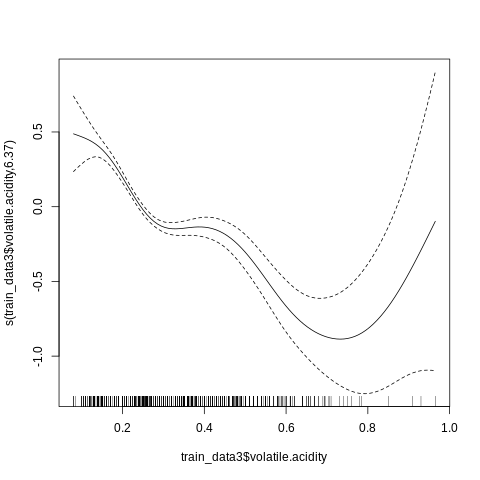

In [207]:
%%R
# (3p) Prepare the GAM model with the 'mgcv' package, with wine quality as target variable and all other variables as predictors.
# Apply smoothing the spline only to 'volatile.acidity' variable

model3_gam <-  gam(train_data3$quality ~ s(train_data3$volatile.acidity) + train_data3$sulphates 
          + train_data3$fixed.acidity + train_data3$chlorides 
          + train_data3$citric.acid + train_data3$residual.sugar 
          + train_data3$free.sulfur.dioxide + train_data3$total.sulfur.dioxide 
          + train_data3$density + train_data3$pH + train_data3$alcohol, 
          data = train_data3)

#summary(model3_gam)
plot(model3_gam)

In [129]:
%%R
# (2p) Prepare a linear regression model with an 'lm' package, with wine quality as target variable and all other variables as predictors.
# Provide Multiple R-squared of the model.

model4_lm <- lm(quality ~ ., data = train_data3)
summary(model4_lm)$r.squared # Returning multiple R-squared from summary


[1] 0.2812058


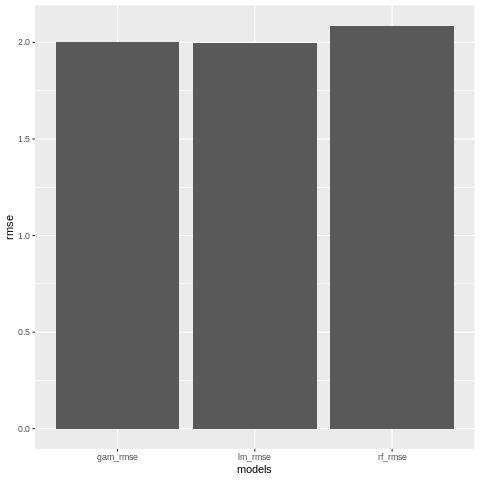

In [211]:
%%R
# (2p) Compare the quality of 3 above models by measuring RMSE for each (on test set) and prepare barplot with those values. 
#Which model is the best in terms of RMSE?

lm.prediction = predict(model4_lm, data = test_data3)
gam.prediction = as.vector(predict(model3_gam,data = test_data3))
rf.prediction = as.vector(predict(model2_rf,data = test_data3))

lm_rmse = sqrt(1/nrow(test_data3) * sum((test_data3$quality - lm.prediction)^2))
gam_rmse = sqrt(1/nrow(test_data3) * sum((test_data3$quality - gam.prediction)^2))
rf_rmse = sqrt(1/nrow(test_data3) * sum((test_data3$quality - rf.prediction)^2))

model_comparison <- data.frame(models=c("lm_rmse", "gam_rmse", "rf_rmse"),
                 rmse=c(lm_rmse, gam_rmse, rf_rmse))

ggplot(data=model_comparison, aes(x=models, y=rmse)) +
    geom_bar(stat="identity")

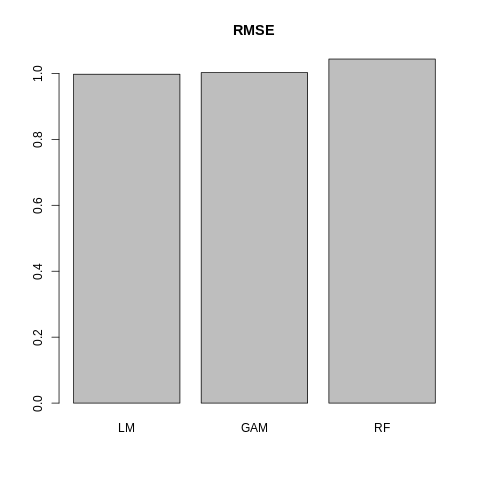

In [214]:
%%R
lm.RMSE<-rmse(test_data3$quality, lm.prediction)
gam.RMSE<-rmse(test_data3$quality, gam.prediction)
rf.RMSE <-rmse(test_data3$quality,rf.prediction)
RMSE<- c(lm.RMSE,gam.RMSE,rf.RMSE)
gam.RMSE
rf.RMSE
barplot(RMSE, main="RMSE", names.arg=c("LM", "GAM", "RF"))
#Generally speaking the model are performing very very similarly, but in both plots Random Forest is the best! 